In [1]:
import plotly.offline as py
from plotly.graph_objs import *
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


py.init_notebook_mode()

pd.set_option('precision', 3)

### 1. Loading the ukf output file

In [2]:
# my_cols=['type','px_est','py_est','vel_abs','yaw_angle','yaw_rate','vx_est','vy_est','px_meas','py_meas','px_gt','py_gt','vx_gt','vy_gt','nis']
df1 = pd.read_table('../data/sample-laser-radar-measurement-data-1.out.txt', sep='\t')
df2 = pd.read_table('../data/sample-laser-radar-measurement-data-2.out.txt',sep='\t')

In [3]:
df1.head(n=5)

,type,px,py,v,yaw_angle,yaw_rate,vx,vy,px_measured,py_measured,px_true,py_true,vx_true,vy_true,NIS
0,R,8.463,0.243,3.040,0.029,0.000e+00,3.039,0.087,8.463,0.243,8.60,0.25,-3.00,0.0,0.000
1,L,8.450,0.252,3.037,0.029,5.793e-06,3.036,0.088,8.448,0.252,8.45,0.25,-3.00,0.0,0.009
2,R,8.475,0.248,1.814,0.020,-7.862e-04,1.813,0.036,8.568,0.242,8.45,0.25,0.00,0.0,3.047
3,L,8.504,0.252,1.758,0.029,2.226e-04,1.757,0.052,8.456,0.254,8.45,0.25,0.00,0.0,0.193
4,R,8.363,0.250,-0.673,0.032,6.189e-04,-0.673,-0.022,8.425,0.254,8.35,0.25,-1.82,0.0,17.232


In [4]:
df2.head(n=5)

,type,px,py,v,yaw_angle,yaw_rate,vx,vy,px_measured,py_measured,px_true,py_true,vx_true,vy_true,NIS
0,L,0.000,0.000,0.100,0.100,0.100,0.100,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,R,0.000,0.000,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,L,1.559,-0.139,0.100,0.100,0.100,0.100,0.010,1.559,-0.139,2.099,0.052,2.196,0.109,0.000
3,R,1.590,0.342,2.359,0.097,0.100,2.348,0.228,1.812,0.047,2.099,0.052,2.196,0.109,3.147
4,L,3.816,-0.135,2.677,-0.238,-0.011,2.601,-0.631,3.891,-0.134,4.291,0.215,2.284,0.226,5.822


### 2. Estimation Charts

##### 2.1 position estimations

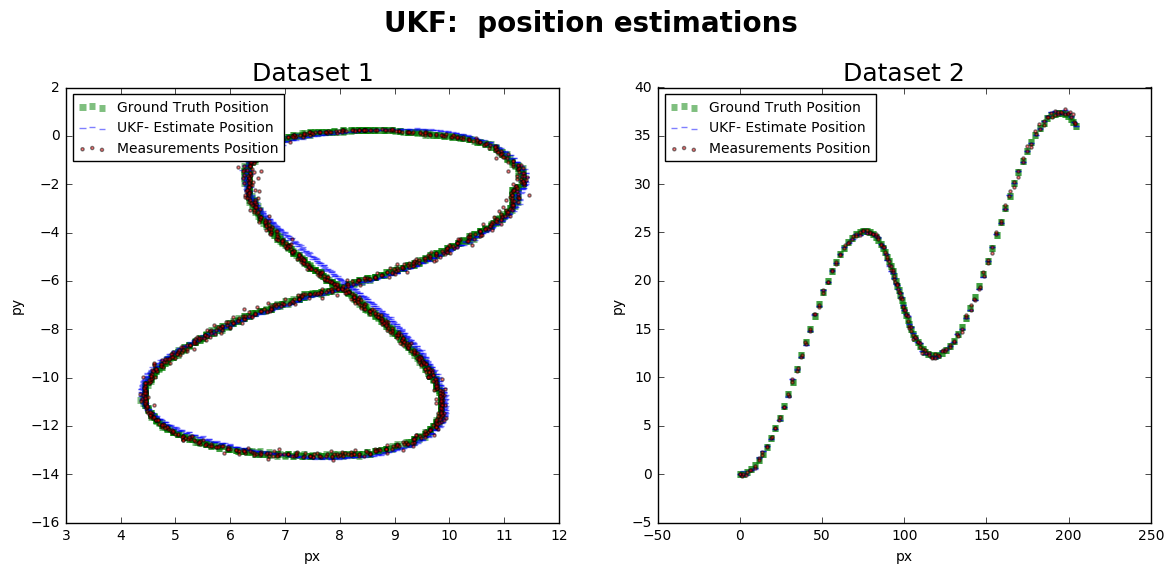

In [40]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle('UKF:  position estimations', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18 )
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.scatter(df1["px_true"],df1["py_true"],marker='_',alpha=0.5,c='g',linewidths='5',label = "Ground Truth Position")
ax.scatter(df1["px"],df1["py"],marker='_',alpha=0.5,c='b',label = "UKF- Estimate Position")
ax.scatter(df1["px_measured"],df1["py_measured"], alpha=0.5,c='r',marker=".", label = "Measurements Position")
ax.legend(loc='upper left',fontsize=10)

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18 )
ax.set_xlabel('px')
ax.set_ylabel('py') 
ax.scatter(df2["px_true"],df2["py_true"],marker='_',alpha=0.5,c='g',linewidths='5',label = "Ground Truth Position")
ax.scatter(df2["px"],df2["py"],marker='_',alpha=0.5,c='b',label = "UKF- Estimate Position")
ax.scatter(df2["px_measured"],df2["py_measured"], alpha=0.5,c='r',marker=".", label = "Measurements Position")
ax.legend(loc='upper left',fontsize=10)

plt.savefig('../images/position_est.png')
plt.show()

##### 2.2 velocity estimation

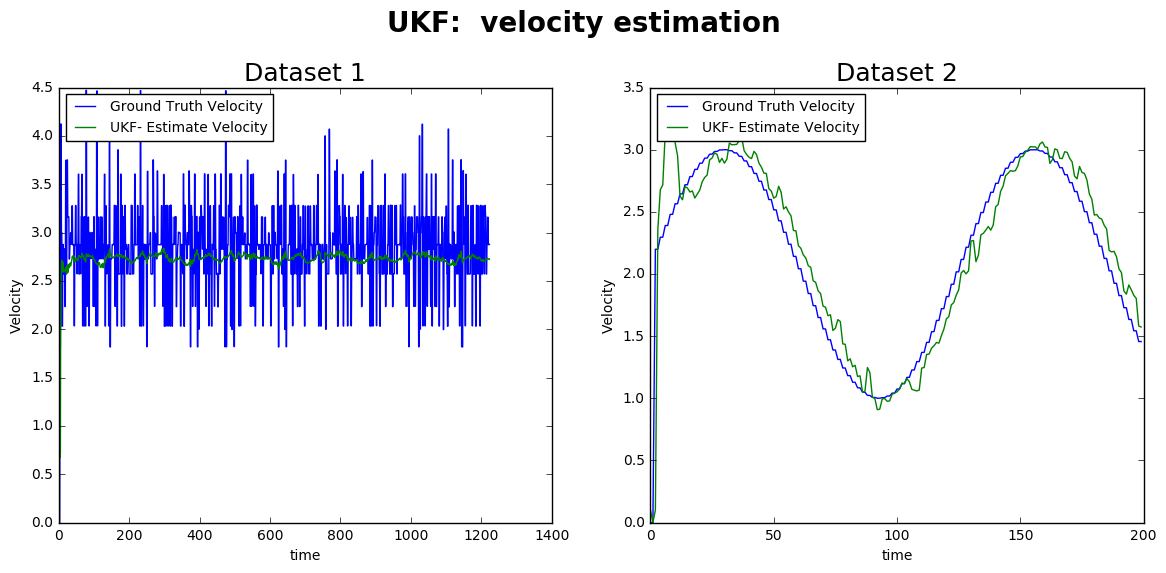

In [41]:
#velocity estimation
v_gt1 = np.sqrt((df1['vx_true'].values **2 + df1['vy_true'].values **2))
v_est1 = np.sqrt((df1['vx'].values **2 + df1['vy'].values **2))
# v_est1 = df1['v'].values

v_gt2 = np.sqrt((df2['vx_true'].values **2 + df2['vy_true'].values **2))
v_est2 = np.sqrt((df2['vx'].values **2 + df2['vy'].values **2))

fig = plt.figure(figsize=(14, 6))
fig.suptitle('UKF:  velocity estimation', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18 )
ax.set_xlabel('time')
ax.set_ylabel('Velocity')
ax.plot(v_gt1,label = "Ground Truth Velocity")
ax.plot(v_est1,label = "UKF- Estimate Velocity")
ax.legend(loc='upper left',fontsize=10)

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18 )
ax.set_xlabel('time')
ax.set_ylabel('Velocity')
ax.plot(v_gt2, label = "Ground Truth Velocity")
ax.plot(v_est2,label = "UKF- Estimate Velocity")
ax.legend(loc='upper left',fontsize=10)

plt.savefig('../images/velocity_est.png')
plt.show()

##### 2.3 yaw angle estimation

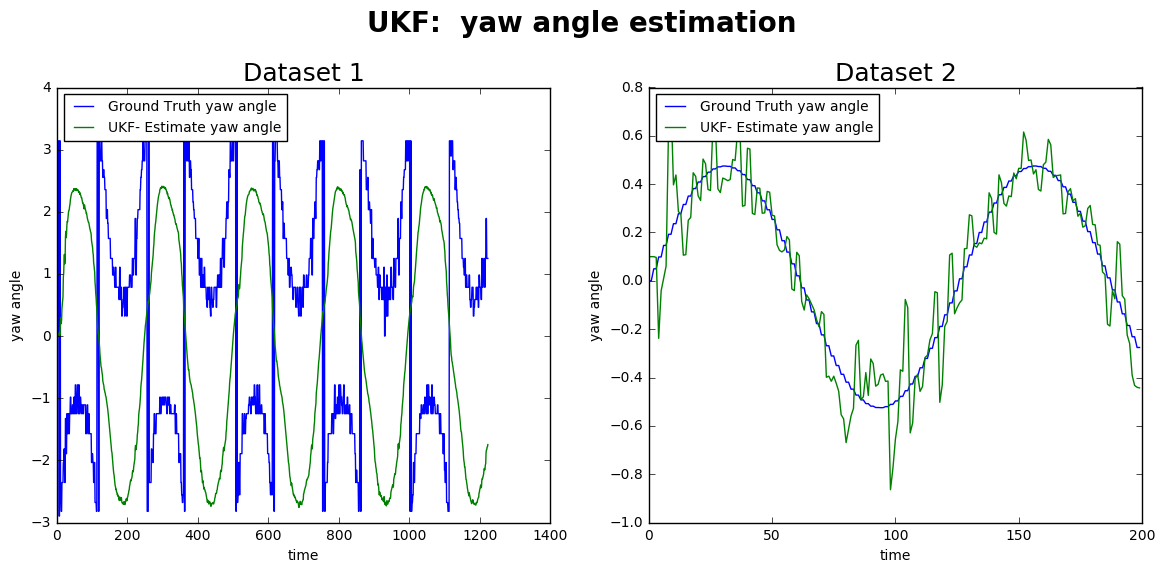

In [42]:
v_gt1 = np.arctan2(df1['vy_true'].values,  df1['vx_true'].values)
v_est1 = df1['yaw_angle'].values

v_gt2 = np.arctan2(df2['vy_true'].values,  df2['vx_true'].values)
v_est2 = df2['yaw_angle'].values

fig = plt.figure(figsize=(14, 6))
fig.suptitle('UKF:  yaw angle estimation', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18 )
ax.set_xlabel('time')
ax.set_ylabel('yaw angle')
ax.plot(v_gt1,label = "Ground Truth yaw angle")
ax.plot(v_est1,label = "UKF- Estimate yaw angle")
ax.legend(loc='upper left',fontsize=10)

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18 )
ax.set_xlabel('time')
ax.set_ylabel('yaw angle')
ax.plot(v_gt2, label = "Ground Truth yaw angle")
ax.plot(v_est2,label = "UKF- Estimate yaw angle")
ax.legend(loc='upper left',fontsize=10)

plt.savefig('../images/yaw_angle_est.png')
plt.show()

##### 2.4  NIS Lidar 

In [26]:
df1.L = pd.read_table('../data/sample-laser-radar-measurement-data-1.out.txt.L', sep='\t')
df1.R = pd.read_table('../data/sample-laser-radar-measurement-data-1.out.txt.R', sep='\t')
df2.L = pd.read_table('../data/sample-laser-radar-measurement-data-2.out.txt.L',sep='\t')
df2.R = pd.read_table('../data/sample-laser-radar-measurement-data-2.out.txt.R',sep='\t')

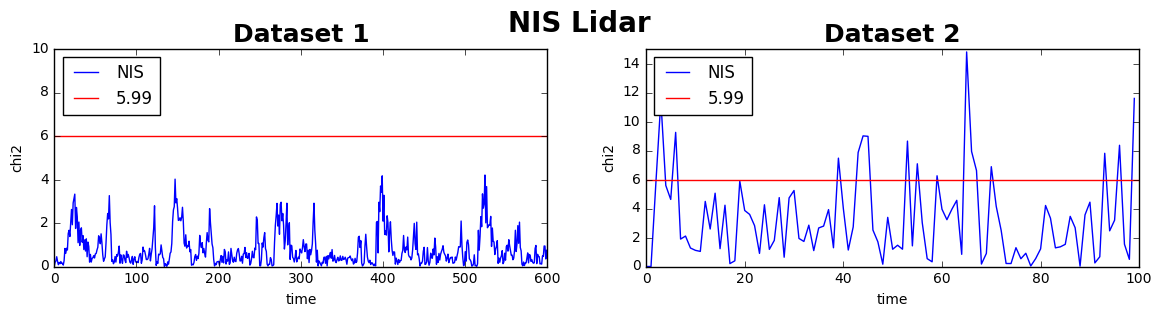

In [38]:
fig = plt.figure(figsize=(14, 3))
fig.suptitle('NIS Lidar', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df1.L['NIS'])
ax.plot((0, 1400), (5.99, 5.99), 'k-', linewidth=1, c='r', label = '5.99')
ax.legend(loc='upper left')
ax.axis([0, 600 , 0, 10])

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df2.L['NIS'])
ax.plot((0, 200), (5.99, 5.99), 'k-', linewidth=1,c='r', label = '5.99')
ax.legend(loc='upper left')
ax.axis([0, 100 , 0, 15])
plt.savefig('../images/NIS_Lidar.png')
plt.show()

##### 2.5  NIS Radar 

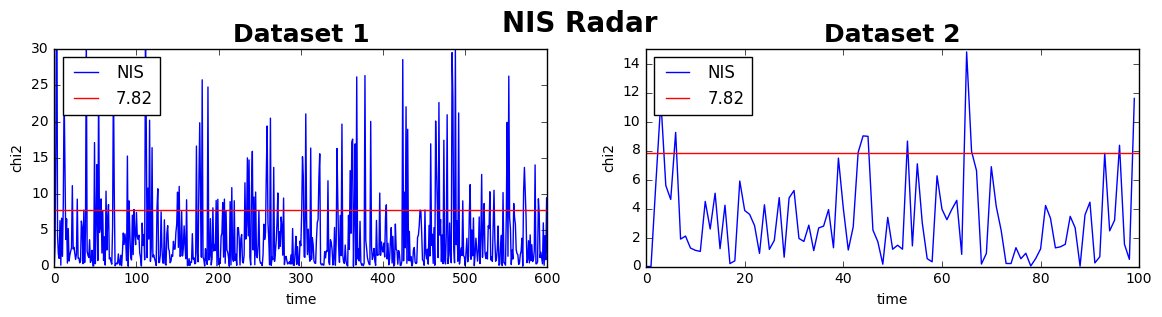

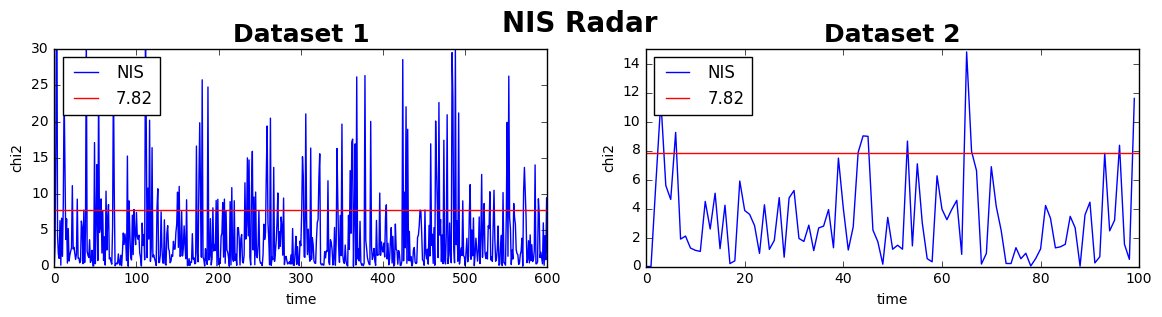

In [37]:
fig = plt.figure(figsize=(14, 3))
fig.suptitle('NIS Radar', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df1.R['NIS'])
ax.plot((0, 1400), (7.82, 7.82), 'k-', linewidth=1, c='r', label = '7.82')
ax.legend(loc='upper left')
ax.axis([0, 600 , 0, 30])

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df2.L['NIS'])
ax.plot((0, 200), (7.82, 7.82), 'k-', linewidth=1,c='r', label = '7.82')
ax.legend(loc='upper left')
ax.axis([0, 100 , 0, 15])
plt.savefig('../images/NIS_radar.png')
plt.show()

In [34]:
len(df1.L['NIS'])

612

In [35]:
len(df1.L[df1.L['NIS']>5.99])/len(df1.L['NIS'])

0.0